<hr/>

# Introduction to Data Science
**Tamás Budavári** - budavari@jhu.edu <br/>

- Principal Component Analysis recap
- PCA in practice: coordinate systems, projections

<hr/>

<h1><font color="yellow">Principal Component Analysis</font></h1>

<!--<img src="files/800px-GaussianScatterPCA.png" width=300 align=left>-->
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f5/GaussianScatterPCA.svg/440px-GaussianScatterPCA.svg.png" width=300 align="right">


### What Features?

- High-dimensional data
- Data transformations
- Interesting directions
- Linear combinations
- Rotated coordinate system

### Basic Idea
1. Centering: PCA starts by centering the data. This means subtracting the mean of each feature so that it's centered around zero. This is important because PCA is affected by the scale of the variables. In scikit-learn, the PCA class takes care of centering the data for you. When you call pca.fit(X), it automatically subtracts the mean from each feature before computing the principal components.

2. Covariance Matrix Calculation: After centering the data, PCA calculates the covariance matrix. The covariance matrix is a square matrix that contains the covariances (a measure of how much two random variables vary together) between each pair of features.

3. Eigen Decomposition: PCA then performs an eigen decomposition of the covariance matrix. This involves finding the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude. In other words, the eigenvalues explain the variance of the data along the new feature axes.

4. Projection: Finally, the original data is projected onto the new feature space. This is done by multiplying the centered data by the principal components.


## Features vs Samples

Yes, in most machine learning libraries, including scikit-learn which is commonly used for PCA in Python, the convention is that observations are represented as rows and features are represented as columns in the data array.

So, if you have a 2D array `X` representing your data, `X[i, j]` represents the value of the `j`-th feature of the `i`-th observation. If `X` has shape `(n, m)`, then you have `n` observations and `m` features.

This is important to keep in mind when preparing your data for PCA or any other machine learning algorithm, as incorrect orientation of your data array can lead to incorrect results.

## Numpy array indexing vs Pandas dataframe indexing
- In numpy, you can use `X[i, j]` to access the `i`-th row and `j`-th column of the array `X`.
- In pandas, you can use `X.iloc[i, j]` to access the `i`-th row and `j`-th column of the dataframe `X`.
- In pandas, you can use `X.loc[i, j]` to access the element of the dataframe `X` whose row label is `i` and column label is `j`.
- In pandas, you can use `X[j]` to access the `j`-th column of the dataframe `X`.
In pandas, you can use `X.loc[i]` to access the `i`-th row of the dataframe `X`.
- 

## Simple Example (2D)

(200, 2)


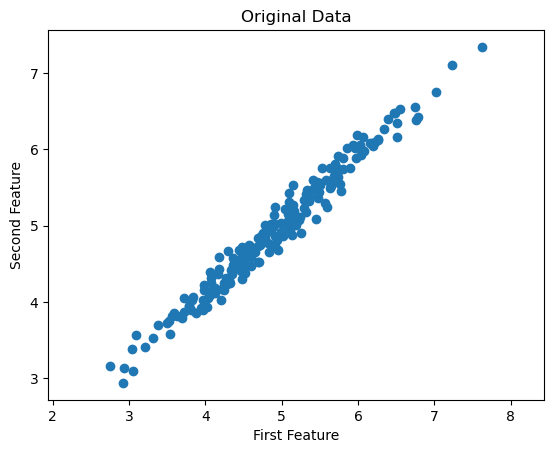

X_centered shape:  (200, 2)


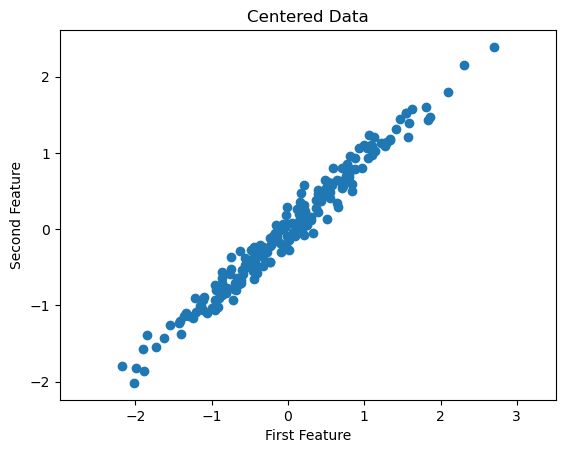

[[ 0.739393   -0.67327408]
 [ 0.67327408  0.739393  ]]
(200, 2)
(2, 2)


/var/folders/z8/6ck_fm35549169b4d3y6myz00000gn/T/ipykernel_45083/2399844810.py:54: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], 'k-', color='r')
/var/folders/z8/6ck_fm35549169b4d3y6myz00000gn/T/ipykernel_45083/2399844810.py:55: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, eigenvectors[0, 1]], [0, eigenvectors[1, 1]], 'k-', color='r')


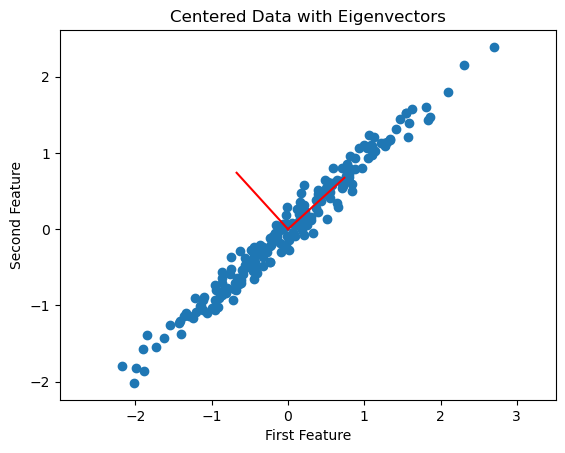

first eigenvector:  [0.739393   0.67327408]
first eigenvalue:  1.4866869146688735
second eigenvector:  [-0.67327408  0.739393  ]
second eigenvalue:  0.010577748425274995


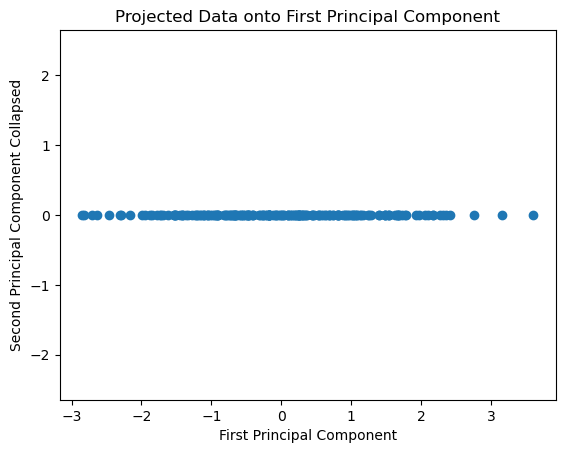

/var/folders/z8/6ck_fm35549169b4d3y6myz00000gn/T/ipykernel_45083/2399844810.py:88: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], 'k-', color='r')


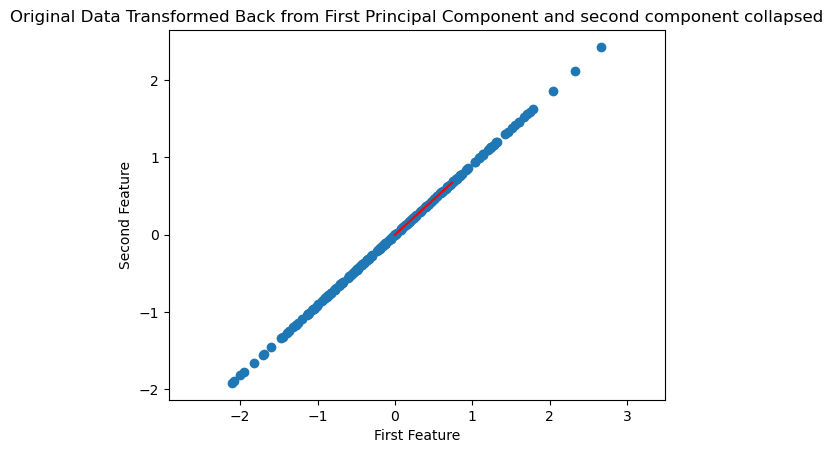

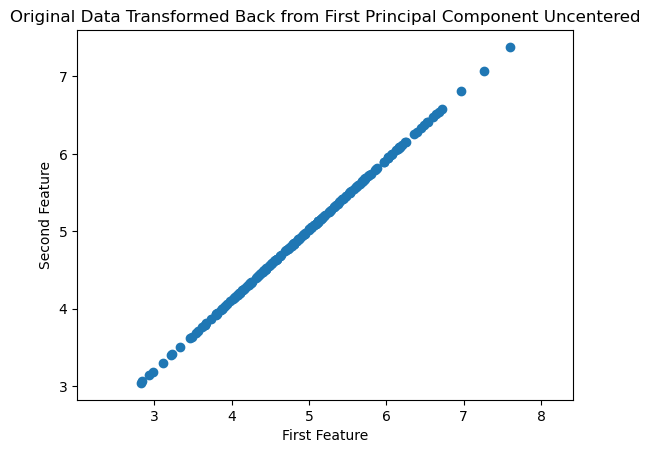

X_pca shape:  (200, 2)


/var/folders/z8/6ck_fm35549169b4d3y6myz00000gn/T/ipykernel_45083/2399844810.py:115: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 0], 'k-', color='r')
/var/folders/z8/6ck_fm35549169b4d3y6myz00000gn/T/ipykernel_45083/2399844810.py:116: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 0], [0, 1], 'k-', color='r')


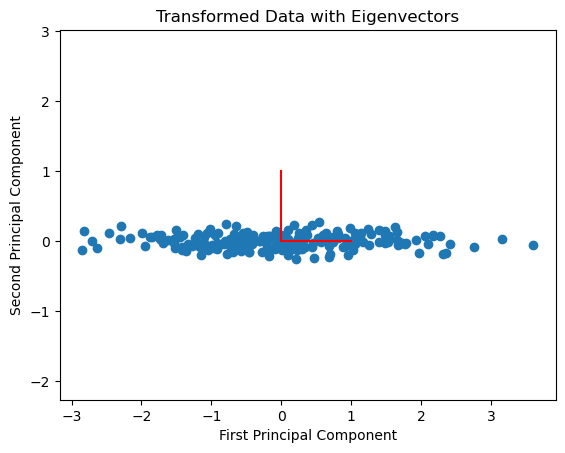

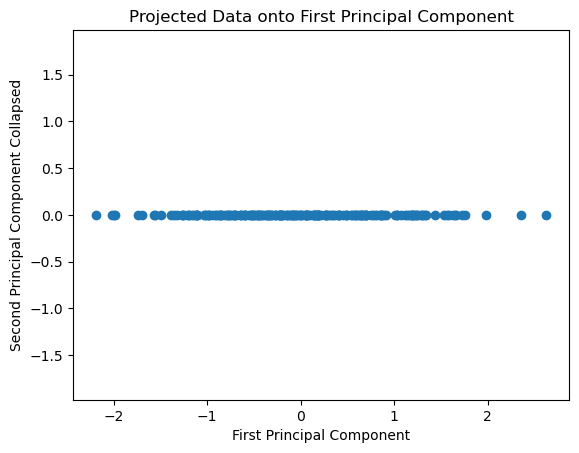

/var/folders/z8/6ck_fm35549169b4d3y6myz00000gn/T/ipykernel_45083/2399844810.py:142: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], 'k-', color='r')


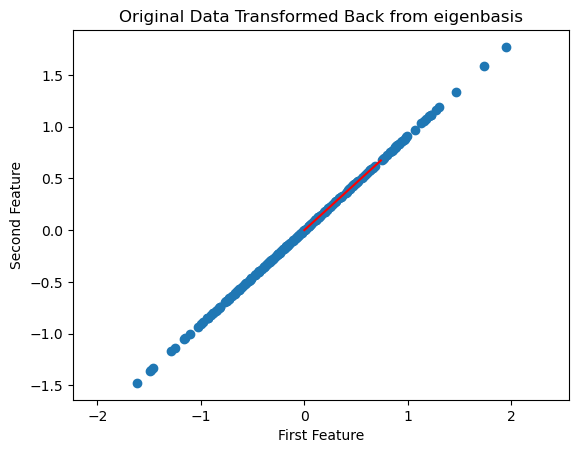

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create a simple 2D dataset that is not cent
np.random.seed(0)
X = np.dot(np.random.rand(2, 2), np.random.randn(2, 200)).T

print(X.shape)

# offset the data to simulate a dataset that is not centered around zero
X = X + np.array([5, 5])

# Plot the original data
plt.scatter(X[:, 0], X[:, 1])
plt.title('Original Data')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.axis('equal')
plt.show()

# Center the data: Subtract the mean of each feature so that it's centered around zero.
X_centered = X - np.mean(X, axis=0) # subtract the mean of each feature from each features datapoints. Eg for feature x1, subtract the mean of x1 from each datapoint in x1

print("X_centered shape: ", X_centered.shape)

# Plot the centered data
plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.title('Centered Data')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.axis('equal')
plt.show()

# Calculate the covariance matrix: The covariance matrix is a square matrix that contains the covariances between each pair of features.
X_cov = np.dot(X_centered.T, X_centered) / (X_centered.shape[0] - 1)

# Perform eigen decomposition: This involves finding the eigenvalues and eigenvectors of the covariance matrix. The eigenvectors (principal components) determine the directions of the new feature space, and the eigenvalues determine their magnitude.
eigenvalues, eigenvectors = np.linalg.eig(X_cov)

# Sort the eigenvectors by eigenvalues in descending order: The eigenvector with the highest corresponding eigenvalue is the first principal component.

# Calculate the indices that would sort the eigenvalues in descending order
idx = np.argsort(eigenvalues)[::-1]

# Use these indices to sort the eigenvectors
eigenvectors = eigenvectors[:,idx]
print(eigenvectors)

print(X_centered.shape)
print(eigenvectors.shape)

# Plot the eigenvectors relative to the original data
plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], 'k-', color='r')
plt.plot([0, eigenvectors[0, 1]], [0, eigenvectors[1, 1]], 'k-', color='r')
plt.title('Centered Data with Eigenvectors')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.axis('equal')
plt.show()

print('first eigenvector: ', eigenvectors[:, 0])
print('first eigenvalue: ', eigenvalues[0])
print('second eigenvector: ', eigenvectors[:, 1])
print('second eigenvalue: ', eigenvalues[1])

# Project the data onto the first principal component: This is done by multiplying the centered data in standard basis by the eigenvector representing the first principal component.
# This results in a new dataset, with dimensionality reduced from 2D to 1D.
# X_centered is a 200x2 matrix, and eigenvectors[:, :1] is a 2x1 matrix. The dot product of these two matrices results in a 200x1 matrix, which is the projected data.
# This collapses the second principal component, resulting in a 1D dataset.
X_proj_first_component = np.dot(X_centered, eigenvectors[:, :1])

# plot the projected data onto the first principal component
plt.scatter(X_proj_first_component, np.zeros(X_proj_first_component.shape))
plt.title('Projected Data onto First Principal Component')
plt.ylabel('Second Principal Component Collapsed')
plt.xlabel('First Principal Component')
plt.axis('equal')
plt.show()

# Transform the centered data back to the original 2D space from projecting onto the first principal component
# This transforms the 1D dataset back to a 2D dataset, but the second component is collapsed since we only projected onto the first principal component and undoing the projection will not recover the second component.
X_new = np.dot(X_proj_first_component, eigenvectors[:, :1].T)

# Plot the transformed data
plt.scatter(X_new[:, 0], X_new[:, 1])
# plot the principal component
plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], 'k-', color='r')
# second principal component is collapsed
plt.title('Original Data Transformed Back from First Principal Component and second component collapsed')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.axis('equal')
plt.show()

# uncenter the projected data
X_uncentered = X_new + np.mean(X, axis=0)

# plot the uncentered projected data
plt.scatter(X_uncentered[:, 0], X_uncentered[:, 1])
plt.title('Original Data Transformed Back from First Principal Component Uncentered')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.axis('equal')
plt.show()

# Transform from standard basis to eigenbasis
# Transform the data: This is done by rotating the data so that it aligns with the basis of the principal components. This is done by multiplying the centered data by the eigenvectors.
X_eigenbasis = np.dot(X_centered, eigenvectors)

print("X_pca shape: ", X_eigenbasis.shape)

# Plot the transformed data relative to the basis defined by the principal components with the eigenvectors
plt.scatter(X_eigenbasis[:, 0], X_eigenbasis[:, 1])
plt.plot([0, 1], [0, 0], 'k-', color='r')
plt.plot([0, 0], [0, 1], 'k-', color='r')
plt.title('Transformed Data with Eigenvectors')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.axis('equal')
plt.show()

# Project the data onto the first principal component: This is done by multiplying the data in the eigenbasis by the first principal component.
# This results in a new dataset, with dimensionality reduced from 2D to 1D.

X_eigenbasis_projected = np.dot(X_eigenbasis, eigenvectors[:, :1])
# Plot the projected data onto the first principal component
plt.scatter(X_eigenbasis_projected, np.zeros(X_eigenbasis_projected.shape))
plt.title('Projected Data onto First Principal Component')
plt.ylabel('Second Principal Component Collapsed')
plt.xlabel('First Principal Component')
plt.axis('equal')
plt.show()


# Transform the projected data back to the original basis from the eigenbasis
X_new_from_eigenbasis = np.dot(X_eigenbasis_projected, eigenvectors[:, :1].T)

# Plot the transformed data
plt.scatter(X_new_from_eigenbasis[:, 0], X_new_from_eigenbasis[:, 1])
# plot the principal component
plt.plot([0, eigenvectors[0, 0]], [0, eigenvectors[1, 0]], 'k-', color='r')
# second principal component is collapsed
plt.title('Original Data Transformed Back from eigenbasis')
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.axis('equal')
plt.show()





### Location & Dispersion

- 1-dimensional

> For example, mean and variance

- $N$-dimensional

> E.g., again mean (duh!) and covariance matrix




## Spectral Decomposition 
- https://www.youtube.com/watch?v=vSczTbgc8Rc
### Properties of Matrices

- Diagonal matrices have the propert of scaling the axes of the coordinate system
- Orthogonal matrices are made up of orthogonal vectors which means when the vetors of the matrix are used as the coordinate system the axes are perpendicular to each other
- A matrix is orthogonal if its transpose is equal to its inverse
- when column vectors of a orthogonal matrix are multiplied with each other the result is 0
- Orthogonal matrix produces a rotation transformation
- inverse of a matrix means the undoing of the transformation
- transpose of a orthogonal matrix is the inverse of an orthogonal matrix
- transpose of a orthogonal matrix means the inverse of the transformation
- transpose of orthogonal matrix means rotation in the reverse direction

### Properties of rectangular matrices

- 2x3 matrix has the ability to transform a vector from 3D to 2D

### Matrix decomposition

- the idea is breaking down a matrix into a product of matrices each with a specific property
- e.g one can have a rotation matrix and a scaling matrix and a shearing matrix

### Eigenvectors and Eigenvalues

- Matrices usually distort vectors from their original line /linear combinations
- Eigenvectors are the vectors that are only scaled by the matrix and stay on the same line
- symmetric Matrices eigenvectors are always orthogonal
- normalizing the eigenvectors and packaging them into a matrix gives the orthogonal rotation matrix
- This matrix rotates standard basis to the eigenvector basis
- Transpose of this eigenvector matrix rotates the eigenvectors to align with the standard basis (reverse rotation)
- Similarily if we multiply a matrix that is not symmetric with its transpose we get a symmetric matrix (square matrix)

### Spectral Decomposition

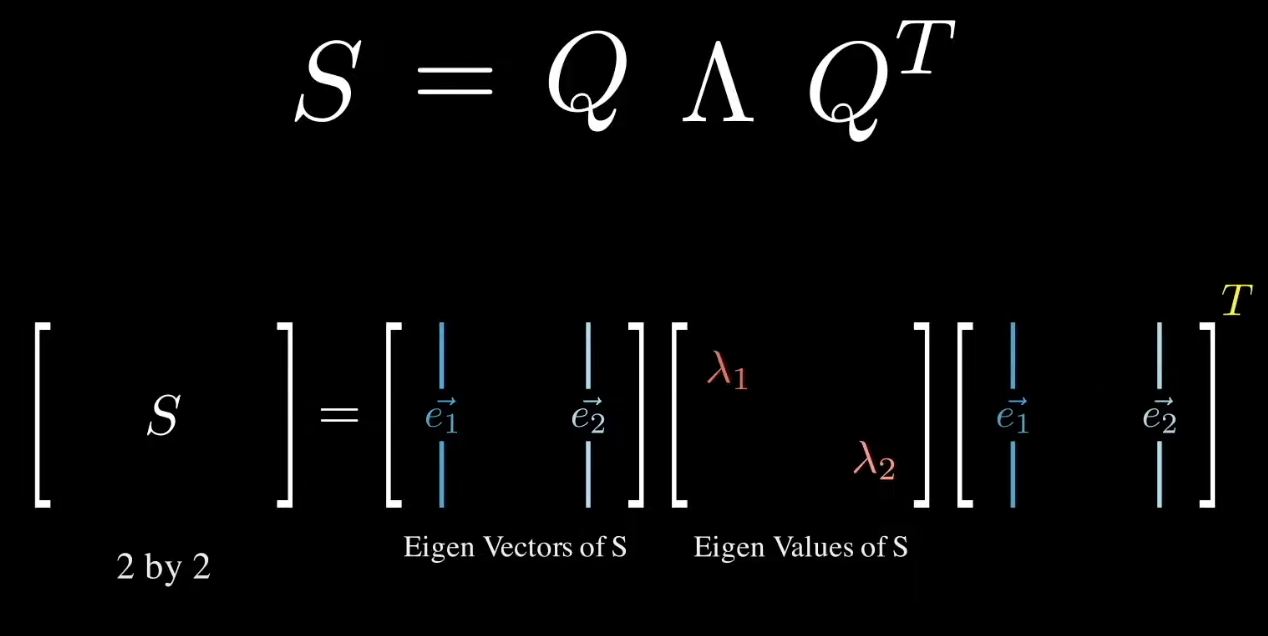

- QT rotates the eigen vectors to the original coordinate system(standard basis)
- Λ scales the eigen vectors
- Q rotates the eigen vectors from standard basis to the original (eigen basis)

### Singular values

- if we have a 2x3 matrix A we can create 2 different square matrices (A^T)A and AA^T (first call it SL and second call it SR)
- These matrices are symmetric and positive semi definite
- The shared eigenvalues of these matrices when square rooted are called the singular values of A
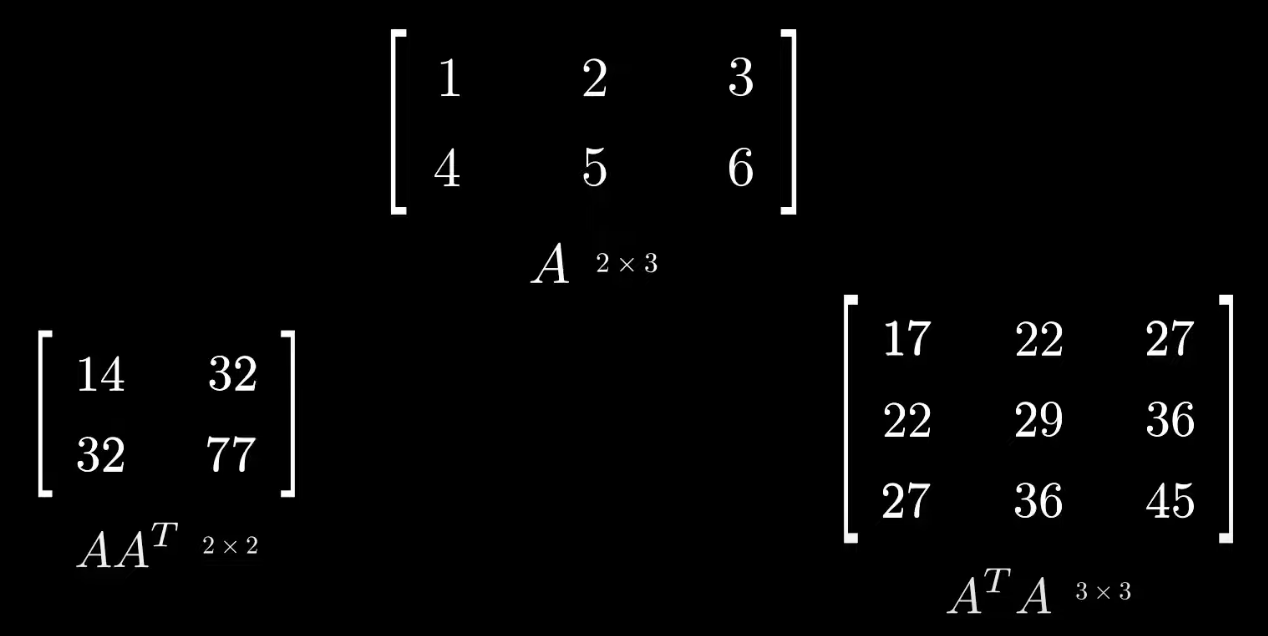

### Singular Value Decomposition

- A = UΣV^T
- Σ is a diagonal matrix with the singular values of A (eigenvalues of A)
- U contains the normalized eigenvectors of SL or A^TA Or also called the left singular vectors of A
- V contains the transpose of the normalized eigenvectors of SR or AA^T Or also called the right singular vectors of A

### Covariance Matrix, Directions of Maximum Variance Generalizsation in N-D

- Let $X\in\mathbb{R}^N$ be a continuous random variable with $\mathbb{E}\left[X\right]=0$ mean and covariance matrix $C$. What is the direction of maximum variance?

- Let $\boldsymbol{X}$ represent the N dimensional-vector of random scalar variables $X$ to $X_N$

>$\boldsymbol{X} = \begin{pmatrix} X_1 \\ X_2 \\ \vdots \\ X_N \end{pmatrix}$
- Mean

>$\displaystyle \mathbb{E}[\boldsymbol{X}] = \begin{pmatrix}\mathbb{E}[X_1]\\\mathbb{E}[X_2]\\\vdots\\\mathbb{E}[X_N]\end{pmatrix} = \begin{pmatrix}\mu_{X_1}\\\mu_{X_2}\\\vdots\\\mu_{X_N}\end{pmatrix}$

- Covariance matrix

>$C = \mathbb{E}\Big[\big(\boldsymbol{X}\!-\!\mathbb{E}[\boldsymbol{X}]\big)\big(\boldsymbol{X}\!-\!\mathbb{E}[\boldsymbol{X}]\big)^T\Big] = \left( \begin{array}{cccc}
\sigma_{X_1}^2 & \mathrm{C}_{X_1,X_2} & \cdots & \mathrm{C}_{X_1,X_N} \\
\mathrm{C}_{X_2,X_1} & \sigma_{X_2}^2 & \cdots & \mathrm{C}_{X_2,X_N} \\
\vdots & \vdots & \ddots & \vdots \\
\mathrm{C}_{X_N,X_1} & \mathrm{C}_{X_N,X_2} & \cdots & \sigma_{X_N}^2
\end{array} \right) = \mathbb{E}\left[\left(XX^T\right)\,\right]$
>
> Same generalization of variance works in any dimensions
TODO Getting lost at this point
> For any vector $a\in\mathbb{R}^N$ , we find that the variance of the projected random vector X onto a
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = \mathbb{E}\left[\left(a^T X - 0\right)\left(X^T a - 0\right)\right] = \mathbb{E}\left[a^T \left(XX^T\right)\,a\right]$
><br/><br/>
> so
><br/><br/>
> $\displaystyle \mathbb{Var}[a^T X] = a^T\,\mathbb{E}\!\left[XX^T\right]\,a = a^T C\,a$
><br/><br/>
> We have to maximize this such that $a^2\!=\!1$

## More Complex Example (3D)


In [3]:
# 3D data
np.random.seed(0)
X = np.dot(np.random.rand(3, 3), np.random.randn(3, 200)).T
X = X + np.array([5, 5, 5])

# Center the data
X_centered = X - np.mean(X, axis=0)

# Calculate the covariance matrix
X_cov = np.dot(X_centered.T, X_centered) / (X_centered.shape[0] - 1)

# Perform eigen decomposition using singular value decomposition


### Principal Components

- Eigensystem of a covariance matrix is special

> $\displaystyle  C\,\boldsymbol{e}_k = \lambda_k\,\boldsymbol{e}_k \ \ \ $ for all $k=1\dots{}N$ 
><br/><br/>
> where
><br/><br/>
> $\displaystyle \boldsymbol{e}_k^T \boldsymbol{e}_l = \delta_{kl} \ \ \ $ for all $k$ and $l$

- The 1st principal component 

> The direction of maximum variance is the eigenvector $\boldsymbol{e}_1$ 
> that belongs to the largest eigenvalue $\lambda_1$
> and $\lambda_1$ is the variance along that direction 
> largest eigenval and vect pair represents largest variance of data points

PCA is based on the eigensystem of a covariance matrix, which is a special type of matrix. The covariance matrix represents how different variables in the data interact with each other. The eigensystem of a covariance matrix consists of its eigenvalues and eigenvectors.

The equation C e_k = λ_k e_k is the defining property of eigenvalues and eigenvectors. Here, C is the covariance matrix, e_k is the k-th eigenvector, and λ_k is the k-th eigenvalue. This equation says that if you multiply the covariance matrix by an eigenvector, you get the same eigenvector scaled by the corresponding eigenvalue.

The equation e_k^T e_l = δ_kl says that the dot product of different eigenvectors is zero (they are orthogonal), and the dot product of an eigenvector with itself is one (they are normalized). Here, δ_kl is the Kronecker delta, which is one when k=l and zero otherwise.

The first principal component is the direction of maximum variance in the data. This is represented by the eigenvector e_1 that corresponds to the largest eigenvalue λ_1. The largest eigenvalue represents the variance of the data along the direction of the corresponding eigenvector. In other words, the first principal component is the direction in which the data varies the most.

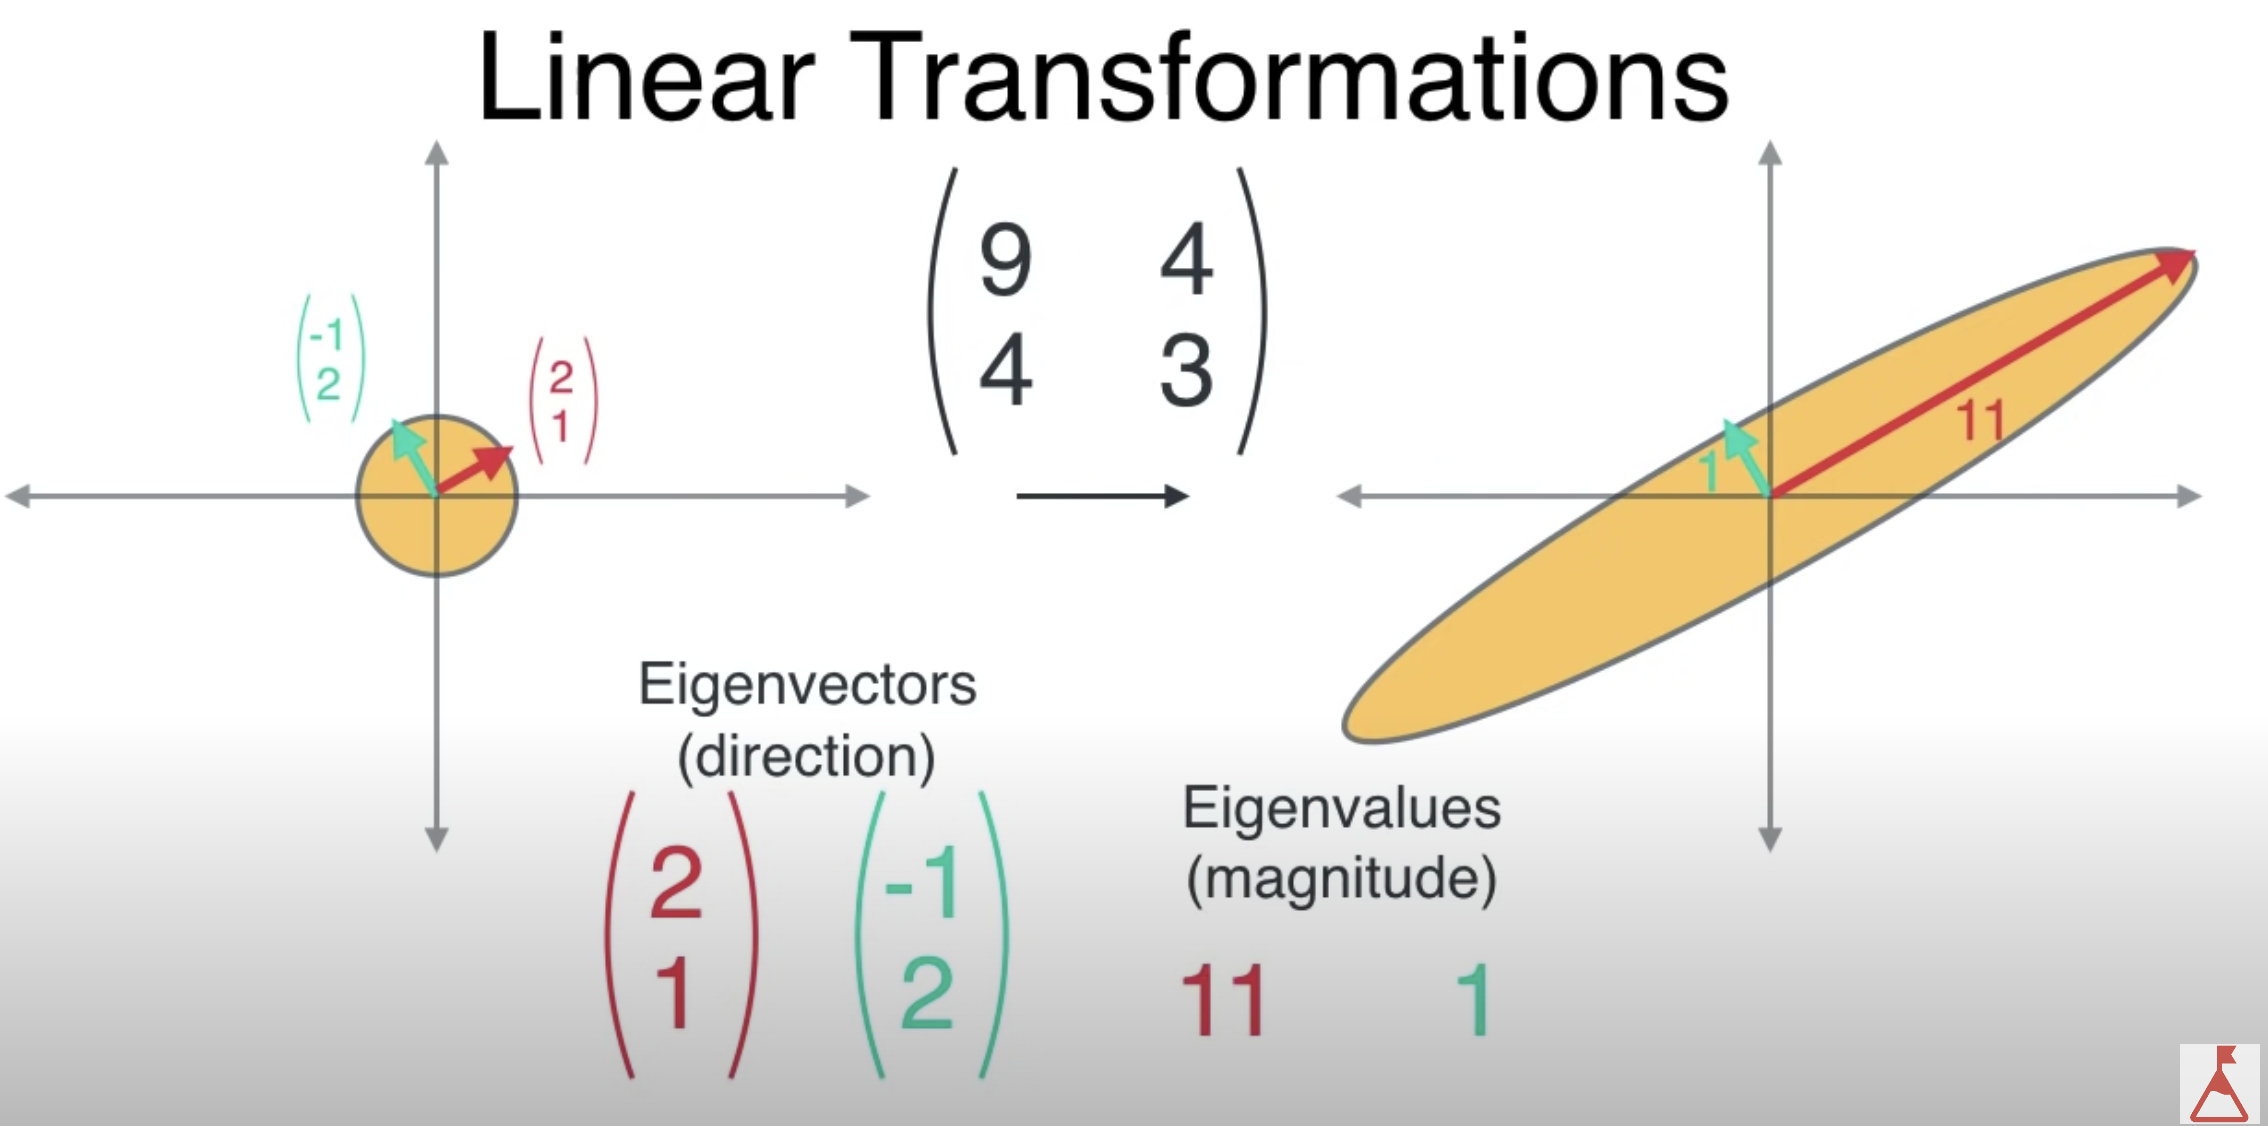

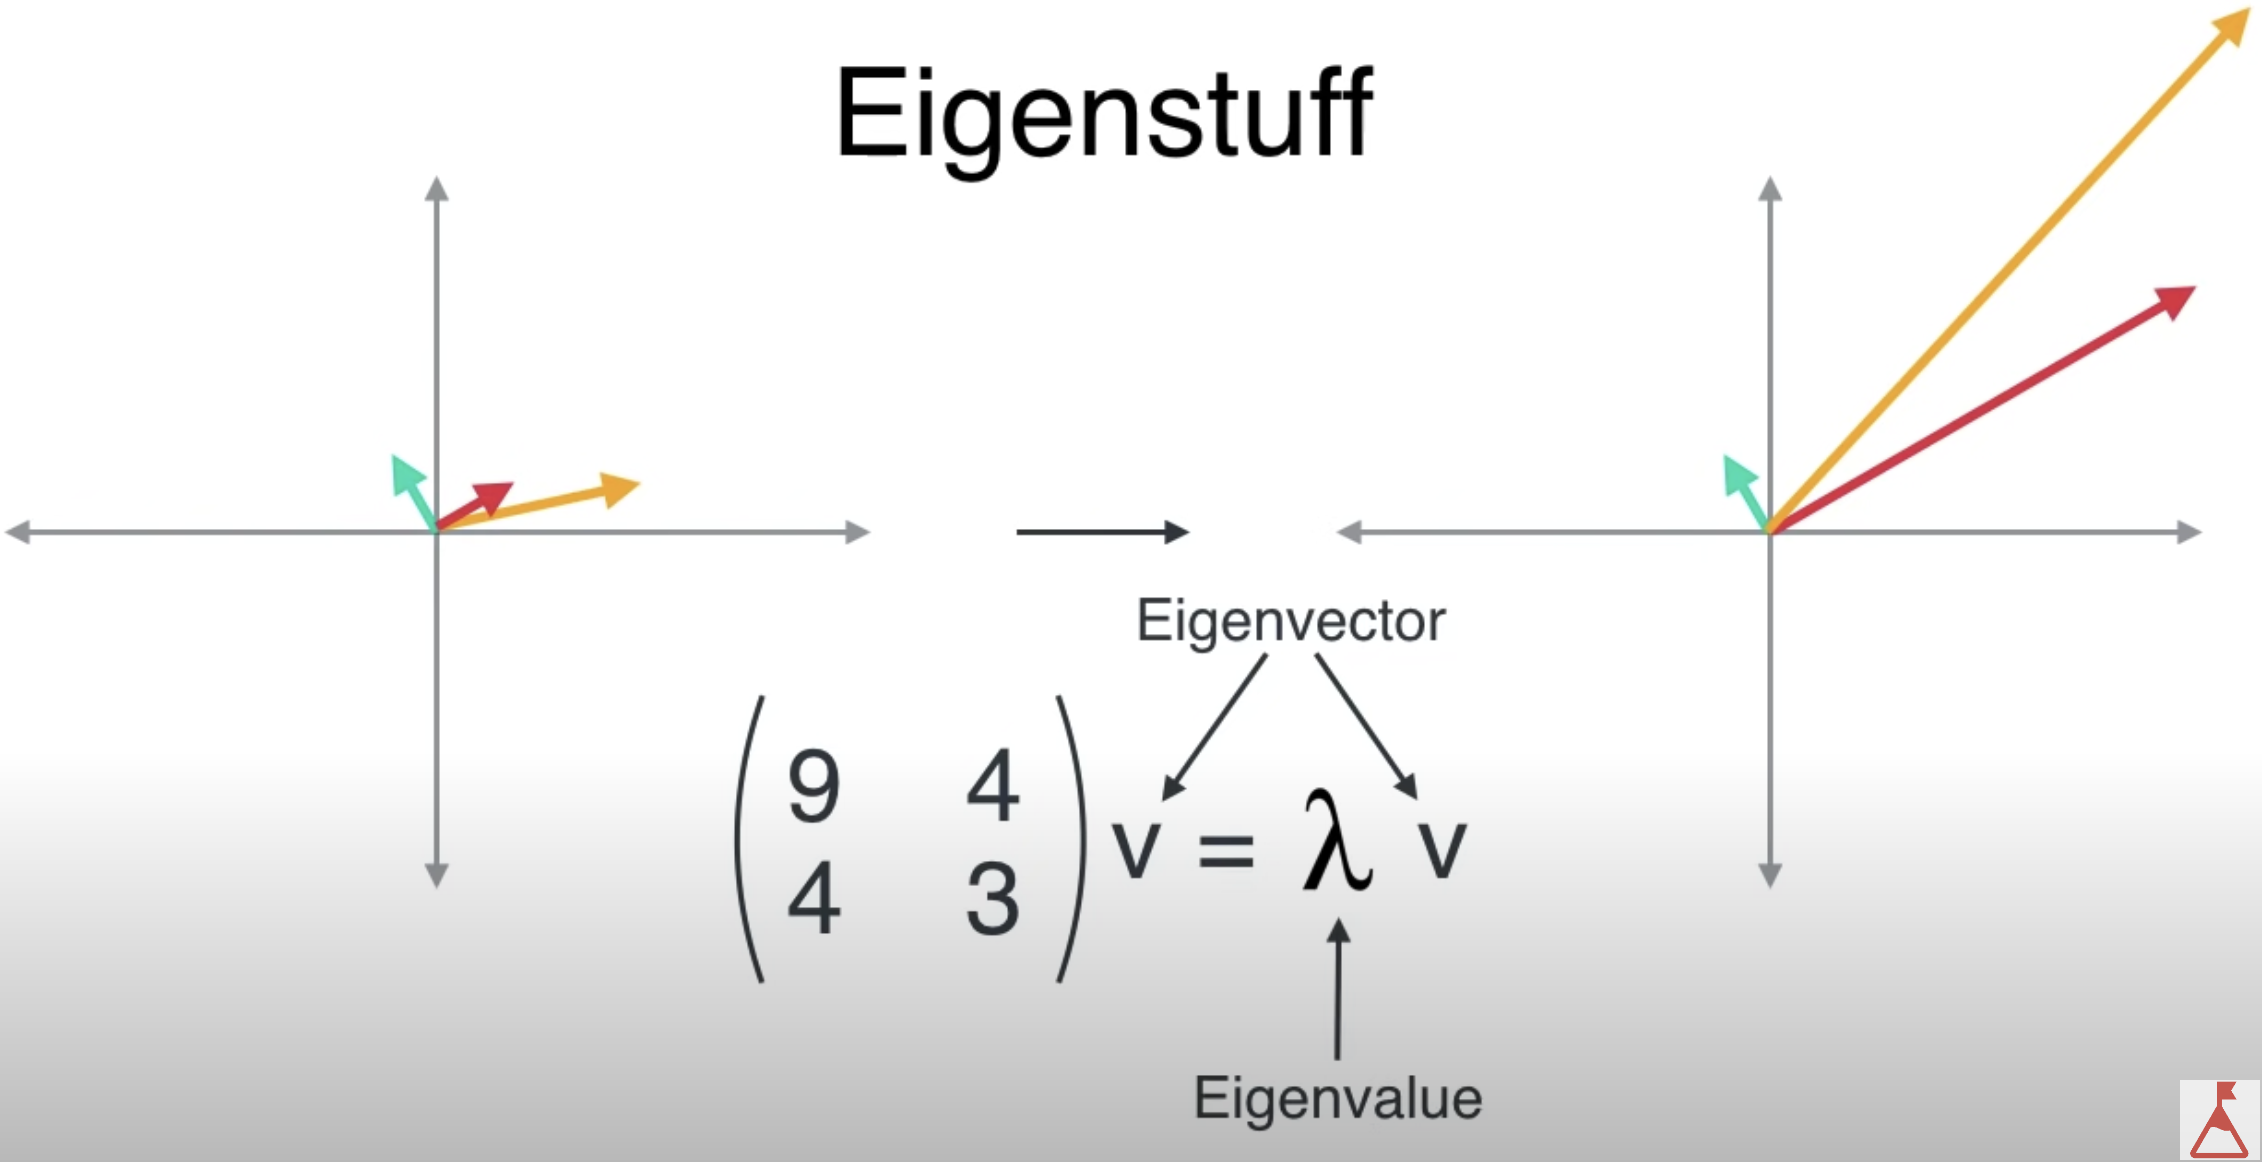

### Linear Combination

- If $X$ is a linear combination of the eigenvectors

> $\displaystyle  X = \sum_k \beta_{k} \boldsymbol{e}_k  =  E\,\boldsymbol\beta$ 
><br/><br/>
> with orthonormal $E=[\boldsymbol{e}_1, ..., \boldsymbol{e}_N]$ eigenbasis

- We get the (random variable) coefficients

> $\displaystyle  \boldsymbol{\beta} = E^T\,X$ 
><br/><br/>
> because $E^T{}E = I$

The first equation, X = Σ_k β_k e_k = E β, is saying that any data point X in your dataset can be represented as a linear combination of the eigenvectors of the covariance matrix of the data. Here, β_k are the coefficients of the linear combination, e_k are the eigenvectors, and E is the matrix whose columns are the eigenvectors. This is the essence of PCA: it transforms the data into a new coordinate system defined by the eigenvectors, where each data point is represented by its coordinates (the β_k) in this new system.

The second equation, β = E^T X, is showing how to compute the coefficients β_k for a given data point X. This is done by multiplying the transpose of the matrix E by the data point X. This works because the eigenvectors are orthonormal, meaning that they are at right angles to each other and their length is 1. Therefore, the transpose of E is also its inverse, so E^T E = I, where I is the identity matrix. This property allows us to easily switch between the original data and the transformed data.

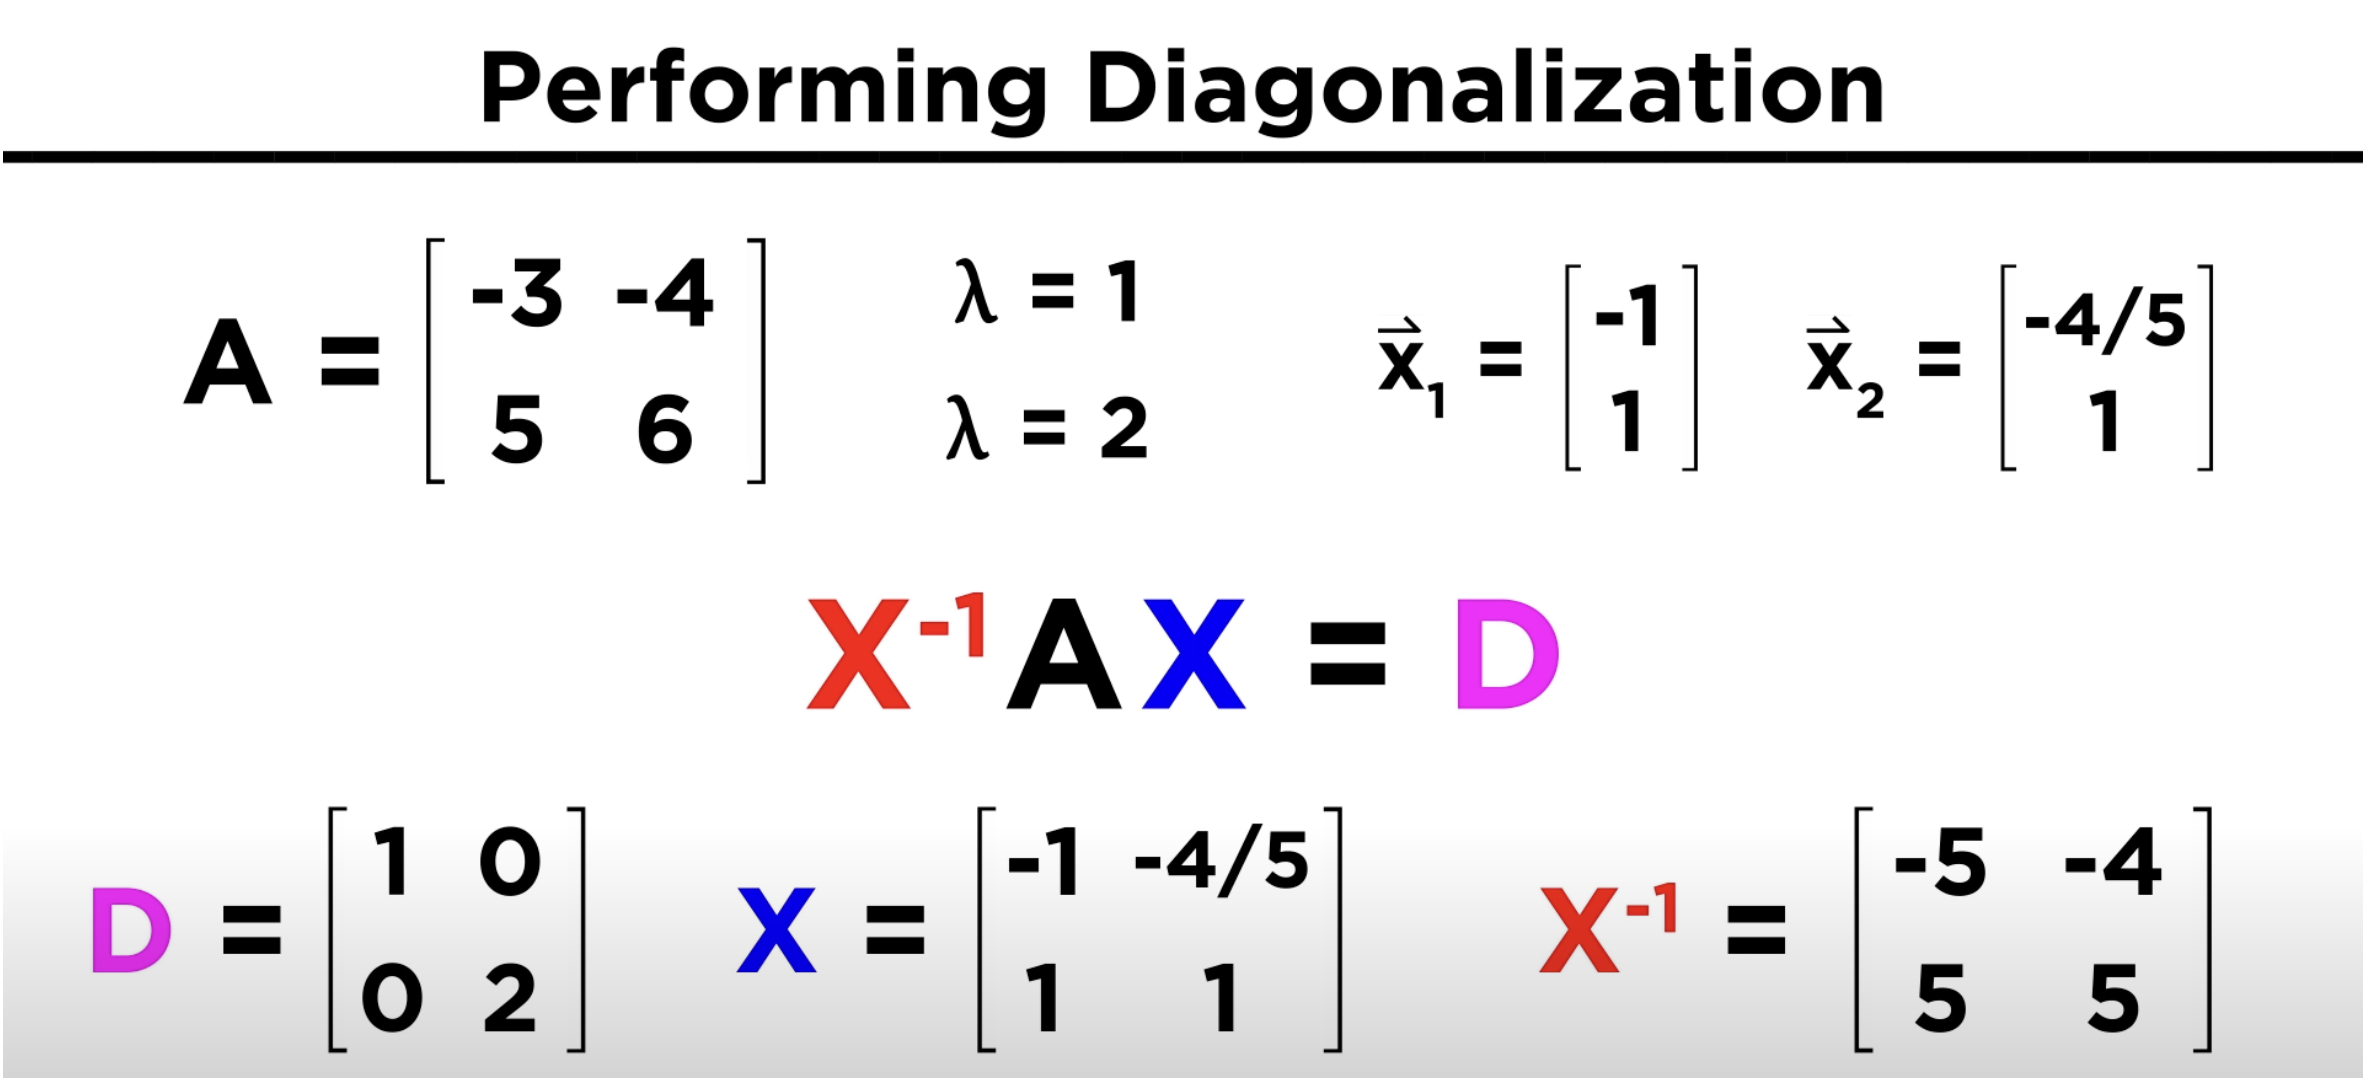

An orthonormal matrix is a square matrix whose rows and columns are orthonormal vectors. An orthonormal vector is a vector of length 1 (unit vector) and orthogonal to other vectors (the dot product is zero).

If Q is an orthonormal matrix, then Q^T Q = Q Q^T = I, where Q^T is the transpose of Q, I is the identity matrix, and = denotes matrix equality.

This property means that the transpose of the matrix Q is also its inverse (Q^-1 = Q^T). This is a very useful property in many areas of computer science and mathematics, including computer graphics, machine learning, and optimization, because it allows for efficient computations.

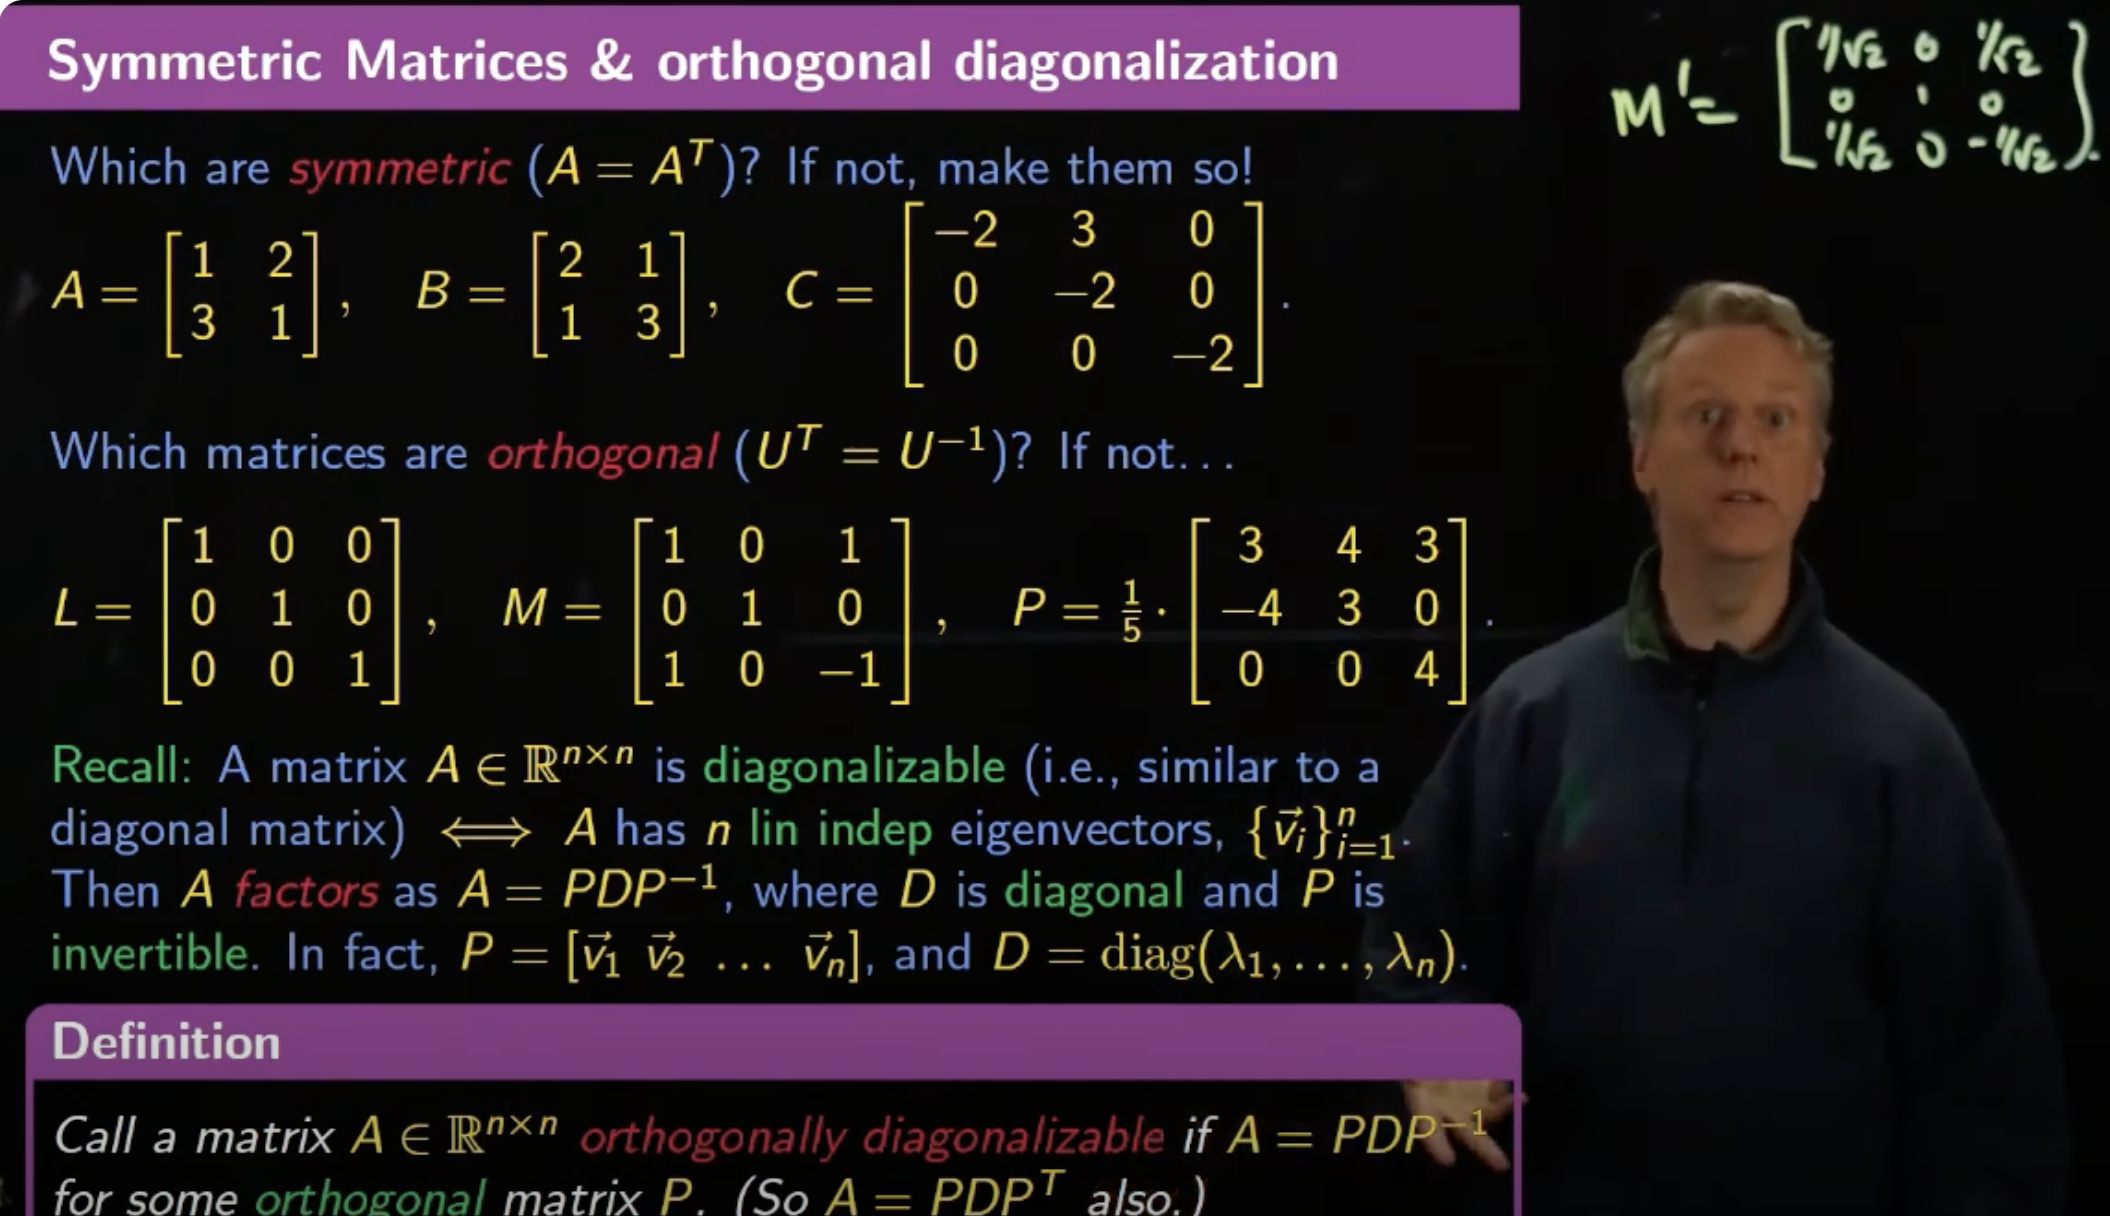

### Coordinate Transformation

- New covariance matrix is diagonal and the elements are the eigenvalues of $C$

> If $\beta=E^T X$ and again assuming $\mathbb{E}[X]=0$ then
><br/><br/>
> $\displaystyle \ \ \ \ \ \ \ \ \mathbb{E}[\beta \beta^T] = \mathbb{E}[E^T X\,X^T E] = E^T C\,E = \Lambda$
><br/><br/>
> where 
><br/><br/>
>$\displaystyle \ \ \ \ \ \ \ \ \Lambda =  \left( \begin{array}{ccc}
{\lambda_1} & 0 & \cdots & 0\\
0 & {\lambda_2} &   & \vdots\\
\vdots &  & \ddots & 0 \\
0 & \cdots & 0 & {\lambda_N} \\
\end{array} \right)$

<!-- -->

> Recall $C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_l$ for all $l$, so the $(k,l)$ element of the new covariance matrix 
><br/><br/>
>$\displaystyle \ \ \ \ \ \ \ \ \boldsymbol{e}_k^T C\,\boldsymbol{e}_l = \lambda_l\,\boldsymbol{e}_k^T  \boldsymbol{e}_l  = \lambda_l\delta_{kl} = \Lambda_{kl}$

### Eigendecomposition 

- If we multiply with $E$ and $E^T$ from left and right 

> $ C = E\,\Lambda\,E^T$
><br/><br/>
> or
><br/><br/>
>$\displaystyle C = \sum_{k=1}^N\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) $

- e_k * e_k^T is a square matrix 

### Largest Eigenvalues

- The eigenvectors of largest eigenvalues capture the most variance

> If keeping only $K<N$ eigenvectors, the best is to take the ones belonging to the $K$ largest eigenvalues PCs
><br/><br/>
> $\displaystyle  C \approx \sum_{k=1}^K\ \lambda_k\left(\boldsymbol{e}_k\,\boldsymbol{e}_k^T\right) =  E_K\Lambda_KE_K^T$



### Dimensionality Reduction


- A truncated set of eigenvectors $E_K$ defines a transformation that reduces the dimensionality from $N$ to $K$ while preserving the most variance possible

> $\displaystyle  \beta_K = E_K^T\, X $
><br/><br/>
> and
><br/><br/>
> $\displaystyle  X_K = E_K \beta_K = E_K E_K^T\, X = P_K\,X $




### Random Sample from Bivariate Normal 

- See previous lecture

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy

In [5]:
np.random.seed(42)
N = scipy.stats.norm(0,1).rvs((2,50))
print(N.shape)
# Is N a vector of 2 random variables with 50 observations or a matrix of 50 random variables with 2 observations?
# copy and scale it
S = np.copy(N)
S[0,:] *= 4  # scale first random variable by 4 TODO why are we scaling the first random variable by 4?

# rotate it
f = np.pi / 4  # 45 degrees
R = np.array([[np.cos(f), -np.sin(f)],
              [np.sin(f),  np.cos(f)]]) 
X = R @ S # Transform S by R

# shift it by some random (column) vector
X += np.array([[1],
               [3]])
print(X.shape)

(2, 50)
(2, 50)


[[ 0.49671415 -0.1382643   0.64768854  1.52302986 -0.23415337 -0.23413696
   1.57921282  0.76743473 -0.46947439  0.54256004 -0.46341769 -0.46572975
   0.24196227 -1.91328024 -1.72491783 -0.56228753 -1.01283112  0.31424733
  -0.90802408 -1.4123037   1.46564877 -0.2257763   0.0675282  -1.42474819
  -0.54438272  0.11092259 -1.15099358  0.37569802 -0.60063869 -0.29169375
  -0.60170661  1.85227818 -0.01349722 -1.05771093  0.82254491 -1.22084365
   0.2088636  -1.95967012 -1.32818605  0.19686124  0.73846658  0.17136828
  -0.11564828 -0.3011037  -1.47852199 -0.71984421 -0.46063877  1.05712223
   0.34361829 -1.76304016]
 [ 0.32408397 -0.38508228 -0.676922    0.61167629  1.03099952  0.93128012
  -0.83921752 -0.30921238  0.33126343  0.97554513 -0.47917424 -0.18565898
  -1.10633497 -1.19620662  0.81252582  1.35624003 -0.07201012  1.0035329
   0.36163603 -0.64511975  0.36139561  1.53803657 -0.03582604  1.56464366
  -2.6197451   0.8219025   0.08704707 -0.29900735  0.09176078 -1.98756891
  -0.2196718

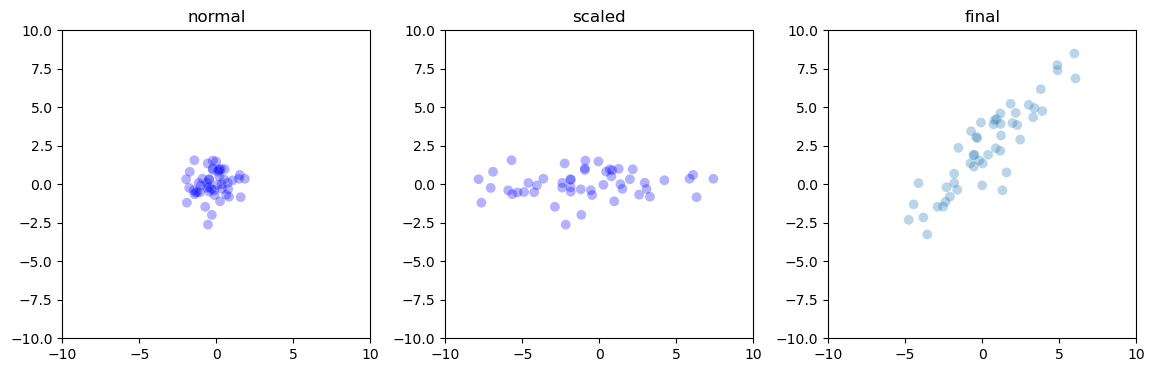

In [6]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('normal')
plt.scatter(N[0,:], N[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')
print(N)
print(N[0,:])


plt.subplot(1,3,2).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('scaled')
plt.scatter(S[0,:], S[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')

plt.subplot(1,3,3).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('final')
plt.scatter(X[0,:], X[1,:], marker='o', s=50, alpha=0.3, edgecolor='none');


Average has shape: (2, 1):
[[0.34969052]
 [2.37483646]]

Covariance has shape (2, 2):
[[6.99670167 6.59167706]
 [6.59167706 7.71554082]]



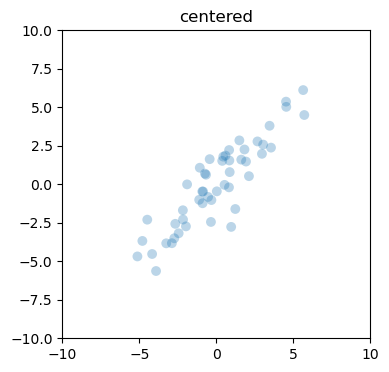

In [7]:
# subtract sample mean
avg = X.mean(axis=1, keepdims=True)
X -= avg

# X is now centered
plt.figure(figsize=(14,4))
plt.subplot(1,2,1).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('centered')
plt.scatter(X[0,:], X[1,:], marker='o', s=50, alpha=0.3, edgecolor='none');

# sample covariance matrix
C = X @ X.T / (X.shape[1] - 1) 
# 

print (f'''
Average has shape: {avg.shape}:
{avg}

Covariance has shape {C.shape}:
{C}
''')

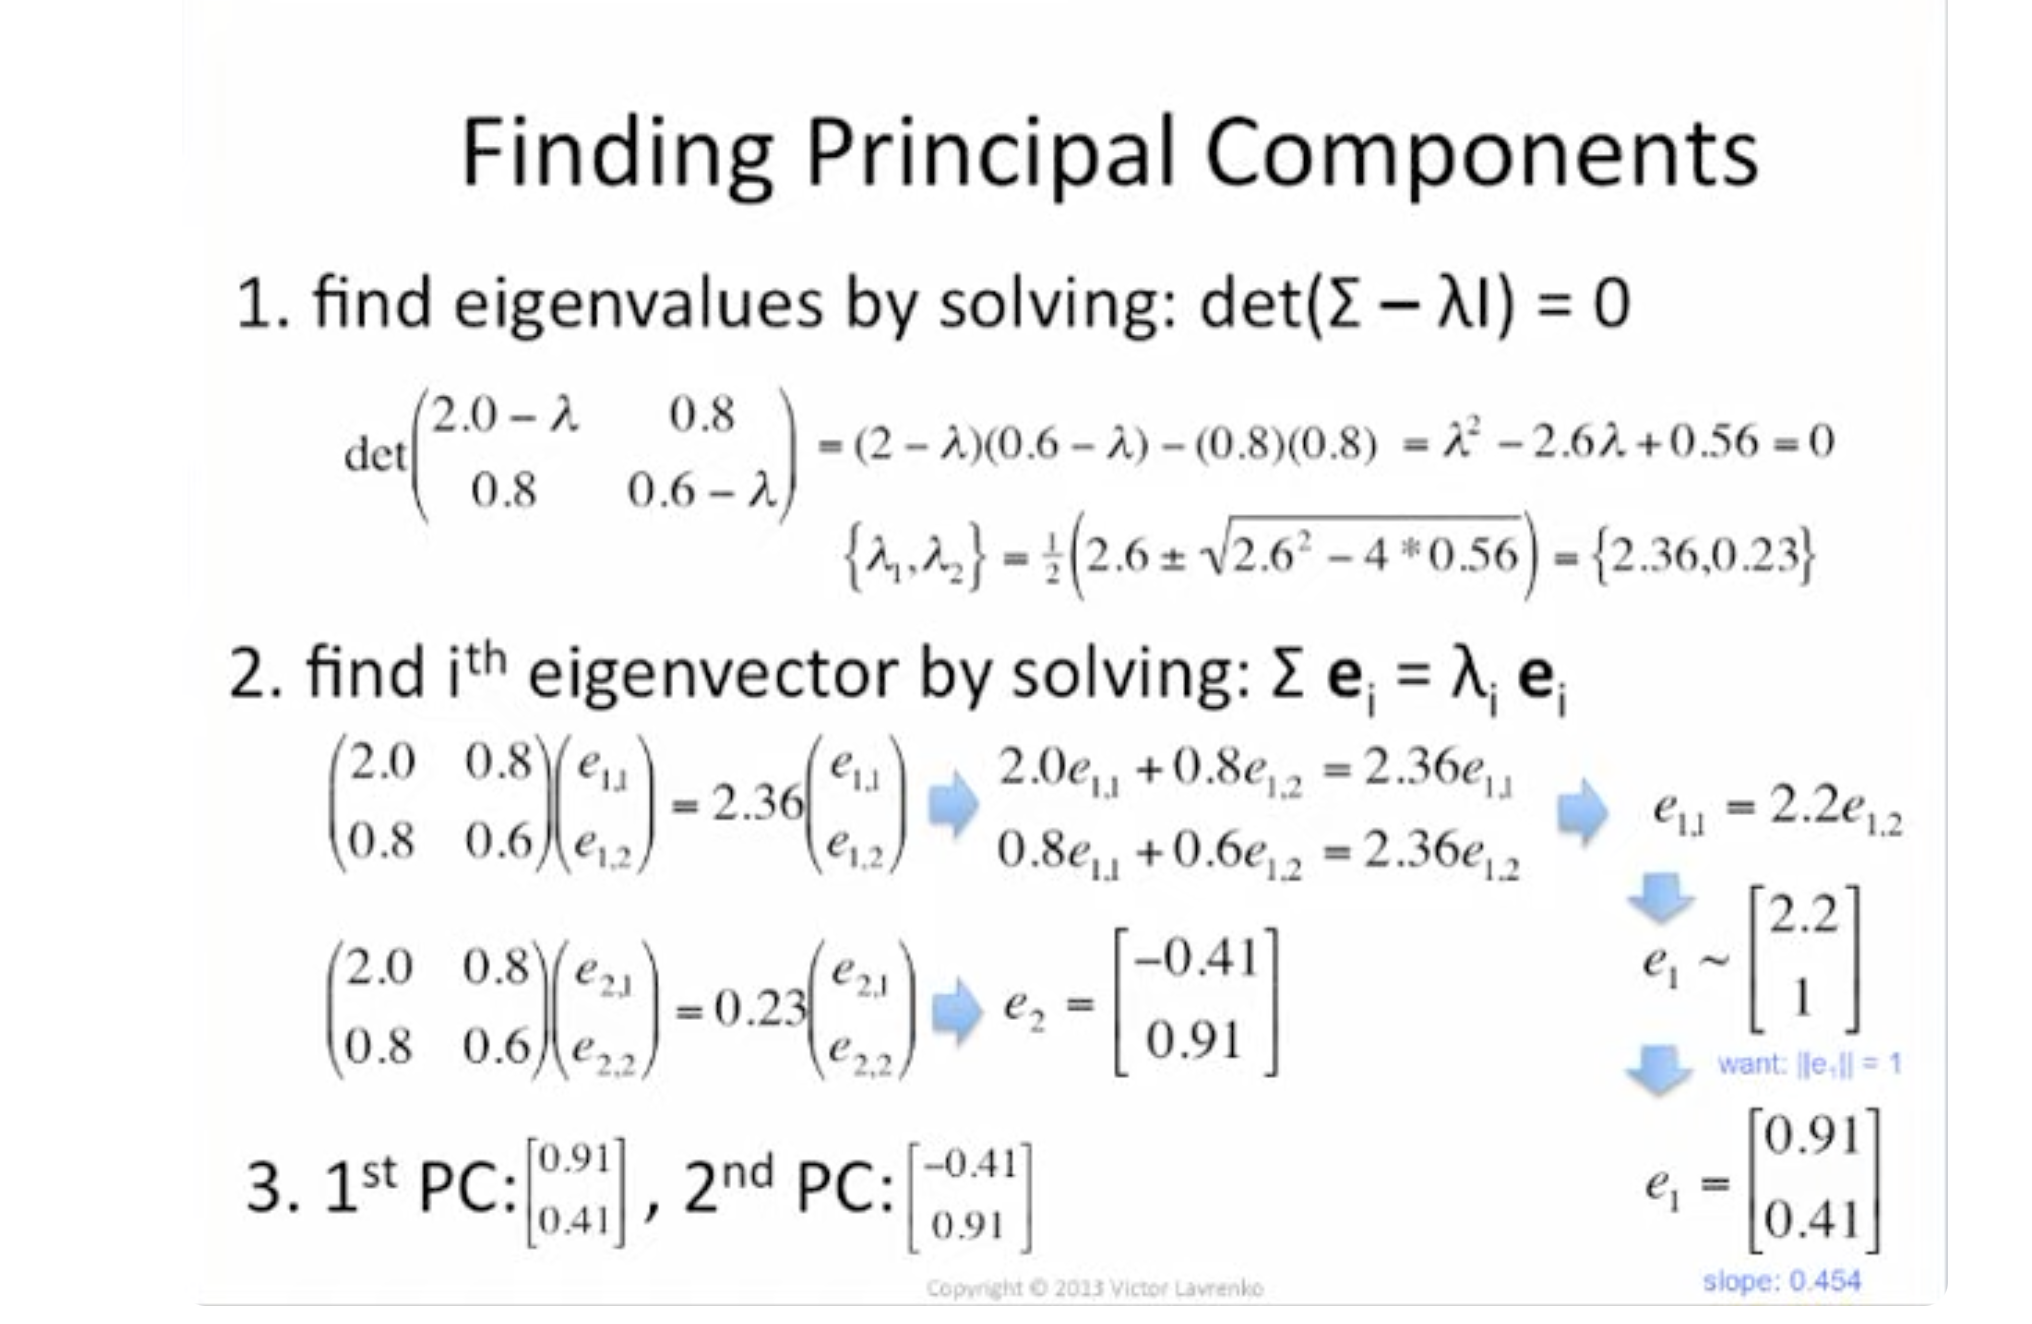

Eigenvalues: [ 0.75465255 13.95758994]
Eigenvectors in the columns of E: 
[[-0.72610102 -0.68758803]
 [ 0.68758803 -0.72610102]]


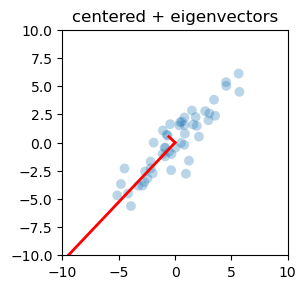

In [8]:
# eigen decomposition of the sample covariance matrix
L, E = np.linalg.eig(C)
print (f'''Eigenvalues: {L}
Eigenvectors in the columns of E: 
{E}''')

# plot the centered data and the eigen vectors scaled by the eigenvalues
plt.subplot(1,2,2).set_aspect('equal'); plt.xlim(-10,10); plt.ylim(-10,10); plt.title('centered + eigenvectors')
plt.scatter(X[0,:], X[1,:], marker='o', s=50, alpha=0.3, edgecolor='none')
plt.plot([0, E[0,0]*L[0]], [0, E[1,0]*L[0]], 'r', lw=2)
plt.plot([0, E[0,1]*L[1]], [0, E[1,1]*L[1]], 'r', lw=2)



In [9]:
# singular value decomposition of covariance yields the same
E, L, E_same = np.linalg.svd(C)

print (f'''Eigenvalues: {L}
Eigenvectors in the columns of E: 
{E}''')

Eigenvalues: [13.95758994  0.75465255]
Eigenvectors in the columns of E: 
[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]]


In [10]:
np.allclose(E, E_same)

True

In [11]:
# it's a rotation!
E @ E.T
# when multiplied to a vector, it rotates it

array([[1.00000000e+00, 5.76185729e-17],
       [5.76185729e-17, 1.00000000e+00]])

In [12]:
# also 
np.allclose(E.T, np.linalg.inv(E))

True

- Using SVD to solve for eigenvectors and eigenvalues
https://medium.com/intuition/singular-value-decomposition-svd-working-example-c2b6135673b5

In [13]:
# singular value decomposition of data matrix yields also the same@
# for W svd returns a 1d array of singular values instead of a matrix with the singular values on the diagonal
print(X.shape)
U, W, V = np.linalg.svd(X)
print('W:', W   )
print (f'''Eigenvalues calculated from W: {np.square(W) / (X.shape[1] - 1)}
Eigenvectors in the columns of U: 
{U}''') 

(2, 50)
W: [26.15190064  6.08095182]
Eigenvalues calculated from W: [13.95758994  0.75465255]
Eigenvectors in the columns of U: 
[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]]


In [14]:
# check out the properties of U and V
[ np.allclose( U.T @ U, np.eye(U[:,0].size) ), 
  np.allclose( V.T @ V, np.eye(V[:,0].size) )  ]

[True, True]

In [15]:
U.shape, V.shape

((2, 2), (50, 50))

In [16]:
# principle components by sklearn
from sklearn import decomposition

In [17]:
# object-oriented interface
pca = decomposition.PCA(n_components = X.shape[0])

# sklearn uses a different convention
pca.fit(X.T) # note the transpose, the observations need to be in the rows and features in the columns
print (pca.components_.T, pca.explained_variance_)

[[ 0.68758803  0.72610102]
 [ 0.72610102 -0.68758803]] [13.95758994  0.75465255]


In [18]:
pca.transform(X.T).shape

(50, 2)

In [19]:
print (E, L)

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [13.95758994  0.75465255]


In [20]:
print (U, W**2 / (X[0,:].size - 1)) # note that the sign of the eigenvectors can be flipped and the eigenvalues are not necessarily in the same order

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]] [13.95758994  0.75465255]


(2, 50)


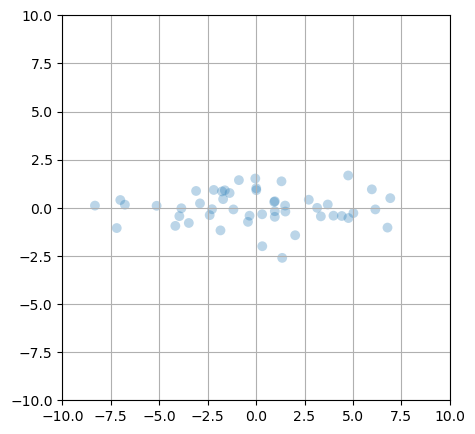

In [21]:
# rotation of the data from the standard basis to the eigenbasis (principal components)
print(X.shape)
A = E.T @ X
# X is the original data centered
# what is A? it's the data in the new coordinate system

# 
plt.figure(figsize=(5,5))
# first param is x vals or the values for first feature, second param is y vals or the values for the second feature
plt.scatter(A[0,:], A[1,:], marker='o', s=50, alpha=0.3, edgecolor='none')
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.grid()

In [22]:
print(E)
E[:,:1] # these are the beta coefficients
print(E[:,:1])
# the beta coefficients are the eigenvectors of the covariance matrix
E[:,1]
print(E[:,1])

[[-0.68758803 -0.72610102]
 [-0.72610102  0.68758803]]
[[-0.68758803]
 [-0.72610102]]
[-0.72610102  0.68758803]


In [23]:
proj_onto_pc1 = E[:,:1].T @ X # first principle component which is the direction of the largest variance
# 1x2 * 2x50 = 1x50
# this is the projection of the data onto the first principle component / eigen vector
print(proj_onto_pc1.shape)

(1, 50)


(2, 50)


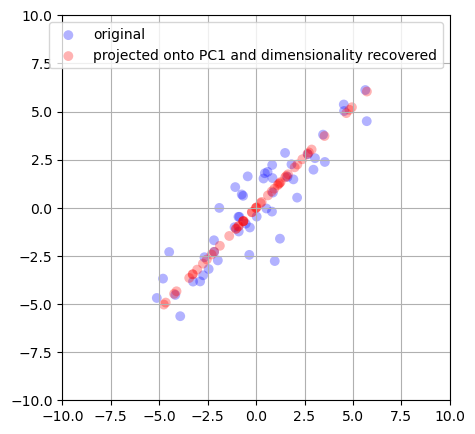

In [24]:
# projected points
Pdata_onto_pc1 = E[:,:1] @ proj_onto_pc1 
# 2x1 * 1x50 = 2x50
# this recovers the dimensionality of the original data
print(Pdata_onto_pc1.shape)

plt.figure(figsize=(5,5)) 
plt.scatter(X[0,:], X[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none', label='original')
plt.scatter(Pdata_onto_pc1[0,:], Pdata_onto_pc1[1,:], marker='o',color='r', s=50, alpha=0.3, edgecolor='none', label='projected onto PC1 and dimensionality recovered')
# Pdata[0,:] is the first feature and Pdata[1,:] is the second feature
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.legend()
plt.grid()

In [25]:
# # plot on first and second principle components
# plt.figure(figsize=(5,5))
# plt.scatter(A[0,:], A[1,:], marker='o', s=50, alpha=0.3, edgecolor='none')
# plt.scatter(proj_onto_pc1[0,:], proj_onto_pc1[1,:], marker='o', s=50, alpha=0.3, edgecolor='none')
# plt.xlim(-10,10)
# plt.ylim(-10,10)
# plt.grid()



### Whitening
- Frequently used to preprocess data, e.g., in signal processing

>$ \displaystyle B = \Lambda^{-1/2}\ E^T\ X$

- **Unhomework:** Verify that its covariance matrix is identity

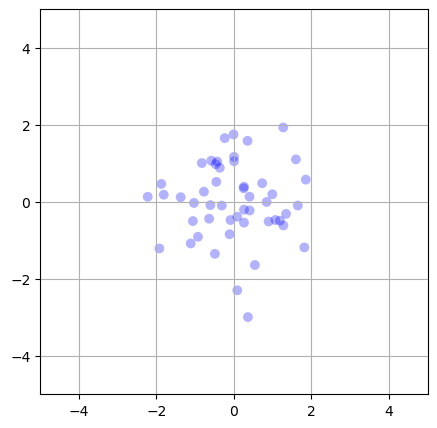

In [26]:
# calc and plot whitened coordinates
B = np.diag(1 / np.sqrt(L)) @ A
# What is A? it's the data in the new coordinate system
plt.figure(figsize=(5,5))
plt.scatter(B[0,:], B[1,:], marker='o',color='b', s=50, alpha=0.3, edgecolor='none')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.grid()

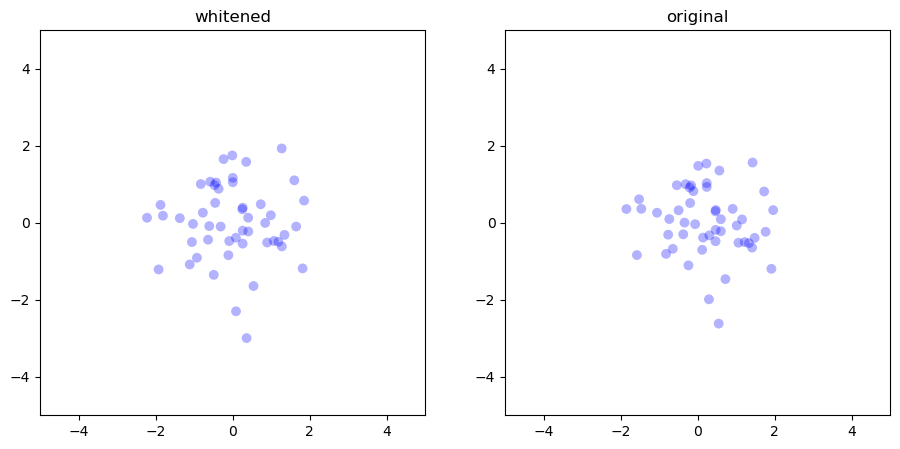

In [27]:
# cf. original normal randoms in cell at the beginning
plt.figure(figsize=(11,5))
plt.subplot(1,2,1).set_aspect('equal'); plt.xlim(-5,5); plt.ylim(-5,5); plt.title('whitened')
plt.scatter(B[0,:], B[1,:], marker='o', color='b', s=50, alpha=0.3, edgecolor='none')
plt.subplot(1,2,2).set_aspect('equal'); plt.xlim(-5,5); plt.ylim(-5,5); plt.title('original')
plt.scatter(-N[0,:], N[1,:], marker='o', color='b', s=50, alpha=0.3, edgecolor='none');

In [28]:
# sample covariance matrix is I
B @ B.T / (B.shape[1] - 1)

array([[1.0000000e+00, 2.1617628e-16],
       [2.1617628e-16, 1.0000000e+00]])